### Feature Selections

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,StratifiedKFold
import importlib
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [6]:
os.getcwd()

'C:\\Users\\Jewel Zhu\\Documents\\GitHub\\NucleiSegmentation\\Feature_selection'

In [12]:
from .Nuclear_Feature_Generation import nuclei_feature_aggregator_main as fa

ModuleNotFoundError: No module named '__main__.Nuclear_Feature_Generation'; '__main__' is not a package

In [8]:
#define the constants for dir folders and filenames
save_mask_dir = '../Nuclear_Feature_Generation/masks_features'

In [1]:
os.getcwd()

NameError: name 'os' is not defined

#  Codes for Feature_Aggregator_tilelevel

In [12]:
#features_agg should requre 2 input parameters:
# save_mask_dir = directory of where the mask_features are stored
# mask_names = list of mask_features's names (excluding '.csv')
# This function will return a dataframe var that outputs aggregated_features_allmasks. The exact dataframe format is shown below. 
#
def features_agg(save_mask_dir, mask_names, ext = '.csv'):
    acc = pd.DataFrame()
    for file_name in mask_names:
        file_path = os.path.join(save_mask_dir, file_name+ext) 
        try:
            #read_data
            tile = pd.read_csv(file_path, index_col = 'mask_num') 
            
            #remove_categorical variables/ clean data
            tile = fa.remove_categorical(tile)
        except:
            print("error_in_file_reading: ", file_path)
            sys.exit(-1)
        
        acc = pd.concat([acc, fa.extract_histogram_features_helper(file_name, tile)])
        acc.index.name = 'tile_name'
    return acc

In [13]:
# how to call features_agg 
aggregated_features_allmasks = features_agg(save_mask_dir, mask_names)

In [14]:
# output of aggaggregated_features_allmasks 
aggregated_features_allmasks.head()

,diagnostics_Image-original_Mean_mean,diagnostics_Image-original_Mean_std,diagnostics_Image-original_Mean_min,diagnostics_Image-original_Mean_5%,diagnostics_Image-original_Mean_50%,diagnostics_Image-original_Mean_95%,diagnostics_Image-original_Mean_max,diagnostics_Image-original_Minimum_mean,diagnostics_Image-original_Minimum_std,diagnostics_Image-original_Minimum_min,...,original_ngtdm_Contrast_95%,original_ngtdm_Contrast_max,original_ngtdm_Strength_mean,original_ngtdm_Strength_std,original_ngtdm_Strength_min,original_ngtdm_Strength_5%,original_ngtdm_Strength_50%,original_ngtdm_Strength_95%,original_ngtdm_Strength_max,cell_count
tile_name,,,,,,,,,,,,,,,,,,,,,
10009_49280_17920,186.895012,5.709219e-14,186.895012,186.895012,186.895012,186.895012,186.895012,14.0,0.0,14.0,...,0.177875,0.330453,1.309686,1.441095,0.000000,0.116989,0.963561,3.884377,11.392000,115
1001_74368_18816,183.445457,0.000000e+00,183.445457,183.445457,183.445457,183.445457,183.445457,11.0,0.0,11.0,...,0.189031,0.610151,1.897633,2.094641,0.000000,0.380498,1.251276,5.185566,19.592760,312
1002_2688_38528,162.219753,0.000000e+00,162.219753,162.219753,162.219753,162.219753,162.219753,10.0,0.0,10.0,...,0.176970,1.283951,3.207441,2.980996,0.000000,0.538643,2.313335,8.712660,22.238683,400
10044_91392_32256,191.062660,0.000000e+00,191.062660,191.062660,191.062660,191.062660,191.062660,11.0,0.0,11.0,...,0.155167,0.405518,1.456460,2.067202,0.102773,0.270197,0.791111,5.073091,16.380952,257
10070_5376_18816,198.683773,0.000000e+00,198.683773,198.683773,198.683773,198.683773,198.683773,11.0,0.0,11.0,...,0.132772,0.296296,1.249580,1.564551,0.000000,0.008737,0.766860,3.699280,9.694785,142


In [15]:
#save them all into .csv 
save_aggr = 'aggregated_features_tilelevel.csv'
aggregated_features_allmasks.to_csv(os.path.join(root_dir, save_aggr))

# === loading aggregated_features_file ===

In [16]:
#read aggregated_features
agg_features = pd.read_csv(os.path.join(root_dir, save_aggr), index_col = 'tile_name')

labels = pd.read_csv(os.path.join(tiles_dir,'dataset.csv'), index_col='tile_name')
labels.drop(columns=['slide_id'],inplace = True)

#join based on tile_name and then split it again so index of the labels matches the aggregated fxn
agg_features_withLabel = agg_features.join(labels, lsuffix='_caller', rsuffix='_other')

#normalized to same index 
X_original = pd.DataFrame(agg_features.values,columns =agg_features.columns)

y_original = pd.DataFrame(agg_features_withLabel['label'].values, columns = ['label'])
y = y_original

## Run correlations to remove colinear features

In [58]:
# Remove the colinear features
# threshold for the correlation
#best without removing colinear features
""""""
threshold = 0.99

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
corr_matrix.head()

,diagnostics_Image-original_Mean_mean,diagnostics_Image-original_Mean_std,diagnostics_Image-original_Mean_min,diagnostics_Image-original_Mean_5%,diagnostics_Image-original_Mean_50%,diagnostics_Image-original_Mean_95%,diagnostics_Image-original_Mean_max,diagnostics_Image-original_Minimum_mean,diagnostics_Image-original_Minimum_std,diagnostics_Image-original_Minimum_min,...,original_ngtdm_Contrast_95%,original_ngtdm_Contrast_max,original_ngtdm_Strength_mean,original_ngtdm_Strength_std,original_ngtdm_Strength_min,original_ngtdm_Strength_5%,original_ngtdm_Strength_50%,original_ngtdm_Strength_95%,original_ngtdm_Strength_max,cell_count
diagnostics_Image-original_Mean_mean,1.00000,0.19035,1.00000,1.00000,1.00000,1.00000,1.00000,0.381423,NaN,0.381423,...,0.019894,0.004361,0.547815,0.072924,0.212821,0.583608,0.663621,0.270652,0.145663,0.739903
diagnostics_Image-original_Mean_std,0.19035,1.00000,0.19035,0.19035,0.19035,0.19035,0.19035,0.040460,NaN,0.040460,...,0.006306,0.025092,0.142959,0.050431,0.051933,0.116243,0.148643,0.111417,0.042735,0.163738
diagnostics_Image-original_Mean_min,1.00000,0.19035,1.00000,1.00000,1.00000,1.00000,1.00000,0.381423,NaN,0.381423,...,0.019894,0.004361,0.547815,0.072924,0.212821,0.583608,0.663621,0.270652,0.145663,0.739903
diagnostics_Image-original_Mean_5%,1.00000,0.19035,1.00000,1.00000,1.00000,1.00000,1.00000,0.381423,NaN,0.381423,...,0.019894,0.004361,0.547815,0.072924,0.212821,0.583608,0.663621,0.270652,0.145663,0.739903
diagnostics_Image-original_Mean_50%,1.00000,0.19035,1.00000,1.00000,1.00000,1.00000,1.00000,0.381423,NaN,0.381423,...,0.019894,0.004361,0.547815,0.072924,0.212821,0.583608,0.663621,0.270652,0.145663,0.739903


In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to be removed.' % (len(to_drop)))
print("These are columns to be removed", to_drop)

#Drop the columns with high correlations
X = X.drop(columns = to_drop)
#test = test.drop(columns = to_drop)

In [60]:
X.head()

,diagnostics_Image-original_Mean_mean,diagnostics_Image-original_Mean_std,diagnostics_Image-original_Minimum_mean,diagnostics_Image-original_Minimum_std,diagnostics_Image-original_Maximum_mean,diagnostics_Image-original_Maximum_std,diagnostics_Mask-original_VoxelNum_mean,diagnostics_Mask-original_VoxelNum_std,diagnostics_Mask-original_VoxelNum_min,diagnostics_Mask-original_VoxelNum_5%,...,original_ngtdm_Contrast_95%,original_ngtdm_Contrast_max,original_ngtdm_Strength_mean,original_ngtdm_Strength_std,original_ngtdm_Strength_min,original_ngtdm_Strength_5%,original_ngtdm_Strength_50%,original_ngtdm_Strength_95%,original_ngtdm_Strength_max,cell_count
0,186.895012,5.709219e-14,14.0,0.0,255.0,0.0,51.860870,30.960044,4.0,9.70,...,0.177875,0.330453,1.309686,1.441095,0.000000,0.116989,0.963561,3.884377,11.392000,115.0
1,183.445457,0.000000e+00,11.0,0.0,255.0,0.0,60.012821,35.037047,8.0,17.00,...,0.189031,0.610151,1.897633,2.094641,0.000000,0.380498,1.251276,5.185566,19.592760,312.0
2,162.219753,0.000000e+00,10.0,0.0,255.0,0.0,70.777500,31.901839,3.0,25.95,...,0.176970,1.283951,3.207441,2.980996,0.000000,0.538643,2.313335,8.712660,22.238683,400.0
3,191.062660,0.000000e+00,11.0,0.0,255.0,0.0,64.392996,42.686690,5.0,15.00,...,0.155167,0.405518,1.456460,2.067202,0.102773,0.270197,0.791111,5.073091,16.380952,257.0
4,198.683773,0.000000e+00,11.0,0.0,255.0,0.0,62.063380,42.699713,6.0,10.00,...,0.132772,0.296296,1.249580,1.564551,0.000000,0.008737,0.766860,3.699280,9.694785,142.0


# Running classifiers

In [ ]:
#Feature Evaluations using Logistic Regression

In [260]:
min_max_scaler = preprocessing.MinMaxScaler()
X = X_original
X = min_max_scaler.fit_transform(X)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
y_train = (y_train.values).ravel()
y_test = (y_test.values).ravel()

clf = LogisticRegression(max_iter= 5000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)

In [261]:
def indicator_helper(x):
    if x >= 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
        
abs_coef = list(map(lambda x: abs(x), clf.coef_.flatten()))
indicator = list(map(lambda x: indicator_helper(x), clf.coef_.flatten()))
d = {'abs_coef': abs_coef, 'indicator': indicator}

var_coef = pd.DataFrame(data = d, index = agg_features.columns)
var_coef.sort_values(by=['abs_coef'], ascending = False, inplace = True)

In [262]:
var_coef.head()

,abs_coef,indicator
cell_count,3.021643,1
original_shape2D_MinorAxisLength_std,2.130631,1
original_gldm_DependenceVariance_max,1.282905,1
original_shape2D_MajorAxisLength_95%,1.024254,-1
original_firstorder_Minimum_max,0.977885,-1


In [21]:
var_coef.to_csv(os.path.join(root_dir, "logistic_regression_coefficients.csv"))

In [11]:
var_coef = pd.read_csv(os.path.join(root_dir, "logistic_regression_coefficients.csv"), index_col = 0)

## Preliminary Analysis on the histogram of those data 

In [12]:
var_coef.head()

,abs_coef,indicator
cell_count,3.021643,1
original_shape2D_MinorAxisLength_std,2.130631,1
original_gldm_DependenceVariance_max,1.282905,1
original_shape2D_MajorAxisLength_95%,1.024254,-1
original_firstorder_Minimum_max,0.977885,-1


In [ ]:
#X_original = 

top_x_initial = 0
gap = 1
top_x_final = top_x_initial + gap
top_features = var_coef.index[top_x_initial :top_x_final]


df = X_original[top_features] 

min_max_scaler = preprocessing.MinMaxScaler() 
df = min_max_scaler.fit_transform(df)

df_stdscaler= StandardScaler().fit_transform(df)
df_maxabsscaler= MaxAbsScaler().fit_transform(df)
df_rs = RobustScaler(quantile_range=(25, 75)).fit_transform(df)
df_pt_yeo = PowerTransformer(method='yeo-johnson').fit_transform(df)
#df_pt_box = PowerTransformer(method='box-cox').fit_transform(df)
df_qt_normal =QuantileTransformer(output_distribution='normal').fit_transform(df)
df_qt_uniform =QuantileTransformer(output_distribution='uniform').fit_transform(df)
df_normalizer =Normalizer().fit_transform(df)


for i, col in enumerate(top_features):
    _ = plt.hist(df[:,i], bins= 'auto') #np.arange(0,1,.005))
    plt.title(col+'_MinMaxScaler')
    plt.show() 
    
    _ = plt.hist(df_stdscaler[:,i], bins= 'auto') #np.arange(0,1,.005))
    plt.title(col+'_stdScaler')
    plt.show() 
    
    _ = plt.hist(df_maxabsscaler[:,i], bins= 'auto') #np.arange(0,1,.005))
    plt.title(col+'_maxabsscaler')
    plt.show() 
    
    _ = plt.hist(df_rs[:,i], bins= 'auto') #np.arange(0,1,.005))
    plt.title(col+'_RobustScaler')
    plt.show() 
    
    _ = plt.hist(df_pt_yeo[:,i], bins= 'auto') #np.arange(0,1,.005))
    plt.title(col+'_PowerTrans_Yeo')
    plt.show() 
    
   # _ = plt.hist(df_pt_box[:,i], bins= 'auto') #np.arange(0,1,.005))
  #  plt.title(col+'_PowerTrans_Box')
 #   plt.show() 
    
    _ = plt.hist(df_qt_normal[:,i], bins= 'auto') #np.arange(0,1,.005))
    plt.title(col+'_qt_normal')
    plt.show() 
    
    _ = plt.hist(df_qt_uniform[:,i], bins= 'auto') #np.arange(0,1,.005))
    plt.title(col+'_qt_uniform')
    plt.show() 
    
    _ = plt.hist(df_normalizer[:,i], bins= 'auto') #np.arange(0,1,.005))
    plt.title(col+'_normalizer')
    plt.show() 

In [263]:
top_x =40
#change ascending to False to get top significant factors
top_x_columns =var_coef.sort_values(by=['abs_coef'], ascending = False)

#best_predictors = top_x_columns.index[:top_x]
#bad_predictors = top_x_columns.index[top_x:]

In [ ]:
top_x_columns[:50]

In [33]:
range_auc = []

for top_x in range(1,30,1):
    # features dropped 
    good_predictors = var_coef.index[:top_x]
    X = X_original[good_predictors] 
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    
    X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
    y_train = (y_train.values).ravel()
    y_test = (y_test.values).ravel()
    auc = try_LogRegr(X_train, X_test, y_train, y_test)
    range_auc.append(auc)

NameError: name 'preprocessing' is not defined

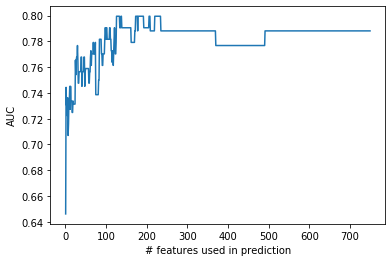

In [289]:
x = np.arange(1,750,1)
plt.plot(x, range_auc)
plt.xlabel('# features used in prediction')
plt.ylabel('AUC')
plt.show()

In [299]:
bad_predictors = top_x_columns.index[2:]
X = X_original.drop(columns = bad_predictors) 

### logistic regression 

In [55]:
def try_LogRegr(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(max_iter= 5000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    #columns = pd.DataFrame(clf.coef , X_train.columns
    #factors = list(zip(columns, clf.coef))
    # print(clf.coef_, clf.intercept_)

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    #print("tn, fp, fn, tp: ",(tn, fp, fn, tp))
    #print(precision_recall_fscore_support(y_test, predictions, average='binary'))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    return (metrics.auc(fpr, tpr))

def try_SVC(X_train, X_test, y_train, y_test):
    clf = SVC(kernel = 'rbf')    # try 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
    clf.fit(X_train, y_train)                  #Train the model using the training sets
    predictions = clf.predict(X_test)                #Predict the response for test dataset
    #print(precision_recall_fscore_support(y_test, y_pred, average='binary'))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    return (metrics.auc(fpr, tpr))

def try_rf(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=5000)
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    #print(precision_recall_fscore_support(y_test, predictions, average='binary'))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    return (metrics.auc(fpr, tpr))


In [64]:
"""
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
"""

'\nimport tensorflow as tf\nfrom tensorflow.keras.layers import Dropout\nfrom tensorflow.keras.models import Sequential \nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.optimizers import SGD\n'

In [56]:
""""""
def try_neuralnet(X_train, X_test, y_train, y_test):
    model = Sequential()
    #variables = len(X_train_test.columns)
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(60, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # define optimizer
    #opt = SGD(learning_rate=0.01, momentum=0.9)
    opt = tf.keras.optimizers.Adam(.01) #(learning_rate=0.01, momentum=0.9)
    # compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])#tf.keras.metrics.AUC()])
    # fit the model
    model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=0)#, class_weight = class_weights)
    predictions = model.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    return(metrics.auc(fpr, tpr))

In [ ]:
range_auc = []

In [78]:

for top_x in range(120, 750,1):
    
    # enumerate splits
    acc_log_auc  = 0
    acc_svc_auc = 0 
    acc_rf_auc = 0
    acc_neural_auc = 0
    #split testing + prediction
    #kfold = KFold(10, shuffle = True, random_state = 1)

    skf = StratifiedKFold(n_splits=10,shuffle = True, random_state = 1)
    y = y_original.values.ravel()

    good_predictors = var_coef.index[:top_x]
    X = X_original[good_predictors]

    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    #X= MaxAbsScaler().fit_transform(X)
    #X = StandardScaler().fit_transform(X)
    #X = RobustScaler(quantile_range=(25, 75)).fit_transform(X)
    #X = PowerTransformer(method='yeo-johnson').fit_transform(X)
    #X =QuantileTransformer(output_distribution='normal').fit_transform(X)
    #X =QuantileTransformer(output_distribution='uniform').fit_transform(X)
    #X =Normalizer().fit_transform(X)

    for i, index in enumerate(skf.split(X,y)):
        (train_index, test_index) = index

        X_train, X_test= X[train_index],X[test_index]
        y_train, y_test = y[train_index],y[test_index]

        acc_log_auc = acc_log_auc + try_LogRegr(X_train, X_test, y_train , y_test)
        #acc_svc_auc = acc_svc_auc + try_SVC(X_train, X_test, y_train, y_test)
        #acc_rf_auc = acc_rf_auc + try_rf(X_train, X_test, y_train, y_test)
        #acc_neural_auc = acc_neural_auc + try_neuralnet(X_train, X_test, y_train, y_test)
    
    range_auc.append(acc_log_auc/10)
#print(acc_svc_auc/10)
#print(acc_rf_auc/10)
#print(acc_neural_auc/10)


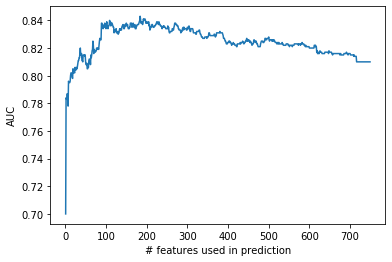

In [79]:
x = np.arange(1,750,1)
plt.plot(x, range_auc)
plt.xlabel('# features used in prediction')
plt.ylabel('AUC')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV